In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import os, os.path
import pickle
import numpy
from galpy.potential import MWPotential2014
from galpy.actionAngle import actionAngleIsochroneApprox
from galpy.orbit import Orbit
from galpy.df import streamdf
from galpy.util import bovy_plot, bovy_conversion, bovy_coords
import seaborn as sns
import MWPotential2014Likelihood
import pal5_util
_REFR0, _REFV0= MWPotential2014Likelihood._REFR0, MWPotential2014Likelihood._REFV0
%pylab inline
from matplotlib import cm
save_figures= False

/Users/bovy/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))

Populating the interactive namespace from numpy and matplotlib


# Tests of the track etc. prediction using ``pal5_util.predict_pal5obs``

## The data

In [3]:
pos_radec= numpy.array([[241.48,6.41,0.09],
                        [240.98,6.15,0.09],
                        [240.48,6.20,0.09],
                        [239.98,5.81,0.09],
                        [239.48,5.64,0.09],
                        [238.48,5.38,0.09],
                        [237.98,5.14,0.09],
                        [233.61,3.17,0.06],
                        [233.11,2.88,0.06],
                        [232.61,2.54,0.06],
                        [232.11,2.23,0.06],
                        [231.61,2.04,0.06],
                        [231.11,1.56,0.06],
                        [230.11,0.85,0.06],
                        [229.11,0.54,0.06],
                        [228.48,-0.77,0.11],
                        [228.11,-1.16,0.14],
                        [227.73,-1.28,0.11],
                        [227.23,-2.03,0.17],
                        [226.55,-2.59,0.14]])
rvel_ra= numpy.array([[225+15*15/60+48.19*0.25/60,-55.9,1.2],
                        [225+15*15/60+49.70*0.25/60,-56.9,0.4],
                        [225+15*15/60+52.60*0.25/60,-56.0,0.6],
                        [225+15*15/60+54.79*0.25/60,-57.6,1.6],
                        [225+15*15/60+56.11*0.25/60,-57.9,0.7],
                        [225+15*15/60+57.05*0.25/60,-55.6,1.5],
                        [225+15*15/60+58.26*0.25/60,-56.4,1.0],
                        [225+15*15/60+58.89*0.25/60,-55.9,0.3],
                        [225+15*15/60+59.52*0.25/60,-59.0,0.4],
                        [225+16*15/60+02.00*0.25/60,-58.0,0.8],
                        [225+16*15/60+03.61*0.25/60,-57.7,2.5],
                        [225+16*15/60+04.81*0.25/60,-57.2,2.7],
                        [225+16*15/60+06.54*0.25/60,-57.1,0.2],
                        [225+16*15/60+07.75*0.25/60,-60.6,0.3],
                        [225+16*15/60+08.51*0.25/60,-60.9,3.3],
                        [225+16*15/60+19.83*0.25/60,-56.9,1.0],
                        [225+16*15/60+23.11*0.25/60,-58.0,2.5],
                        [225+16*15/60+34.71*0.25/60,-58.2,3.8],
                        [225+16*15/60+08.66*0.25/60,-56.8,0.7],
                        [225+16*15/60+09.58*0.25/60,-57.7,0.3],
                        [225+15*15/60+52.84*0.25/60,-55.7,0.6],
                        [225+15*15/60+56.21*0.25/60,-55.9,0.7],
                        [225+16*15/60+05.26*0.25/60,-54.3,0.3],
                        [225+17*15/60+09.99*0.25/60,-57.0,0.4],
                        [225+17*15/60+34.55*0.25/60,-56.5,3.1],
                        [225+17*15/60+58.32*0.25/60,-57.5,3.3],
                        [225+18*15/60+04.96*0.25/60,-57.7,2.6],
                        [225+18*15/60+18.92*0.25/60,-57.6,3.6],
                        [225+18*15/60+35.89*0.25/60,-56.7,1.3],
                        [225+19*15/60+21.42*0.25/60,-61.7,3.1],
                        [225+21*15/60+51.16*0.25/60,-55.6,0.4],
                        [225+24*15/60+04.85*0.25/60,-56.5,2.6],
                        [225+24*15/60+13.00*0.25/60,-50.0,2.4],
                        [225+28*15/60+39.20*0.25/60,-56.6,1.4],
                        [225+28*15/60+49.34*0.25/60,-52.4,3.8],
                        [225+34*15/60+19.31*0.25/60,-55.8,1.8],
                        [225+34*15/60+31.90*0.25/60,-52.7,4.0],
                        [225+34*15/60+56.51*0.25/60,-51.9,1.6],
                        [225+45*15/60+10.57*0.25/60,-45.6,2.6],
                        [225+46*15/60+49.44*0.25/60,-48.0,2.4],
                        [225+48*15/60+57.99*0.25/60,-46.7,2.3],
                        [225+55*15/60+24.13*0.25/60,-41.0,2.7],
                        [240+0*15/60+45.41*0.25/60,-41.1,2.8],
                        [240+1*15/60+12.59*0.25/60,-40.8,2.5],
                        [240+3*15/60+29.59*0.25/60,-45.2,3.9],
                        [240+4*15/60+05.53*0.25/60,-44.9,4.0],
                        [240+4*15/60+33.28*0.25/60,-45.1,3.5],
                        [240+13*15/60+40.97*0.25/60,-41.1,3.4],
                        [240+16*15/60+44.79*0.25/60,-44.0,3.0],
                        [240+16*15/60+51.73*0.25/60,-43.5,2.5],
                        [225+8*15/60+07.15*0.25/60,-57.8,1.1],
                        [225+8*15/60+17.50*0.25/60,-62.0,2.3],
                        [225+10*15/60+39.02*0.25/60,-58.0,1.0],
                        [225+11*15/60+09.04*0.25/60,-66.9,2.1],
                        [225+11*15/60+21.70*0.25/60,-53.8,1.1],
                        [225+12*15/60+45.44*0.25/60,-52.5,2.2],
                        [225+13*15/60+40.44*0.25/60,-58.6,1.4],
                        [225+13*15/60+54.40*0.25/60,-59.8,3.7],
                        [225+14*15/60+09.32*0.25/60,-57.9,3.5],
                        [225+14*15/60+17.18*0.25/60,-59.2,1.7],
                        [225+14*15/60+20.71*0.25/60,-56.7,2.3],
                        [225+14*15/60+34.63*0.25/60,-59.1,1.3],
                        [225+15*15/60+16.47*0.25/60,-58.6,2.3],
                        [225+15*15/60+50.43*0.25/60,-55.7,2.3],
                        [225+16*15/60+01.54*0.25/60,-58.7,1.4],
                        [225+16*15/60+34.95*0.25/60,-59.7,0.4],
                        [225+16*15/60+56.20*0.25/60,-58.7,0.2]])

## Some convenience functions

In [4]:
def plot_data_add_labels(color=sns.color_palette()[2]):
    subplot(1,2,1)
    xlabel(r'$\mathrm{RA}\,(\mathrm{degree})$')
    ylabel(r'$\mathrm{Dec}\,(\mathrm{degree})$')
    xlim(250.,220.)
    ylim(-5.,9.)
    bovy_plot._add_ticks()
    errorbar(pos_radec[:,0],pos_radec[:,1],yerr=pos_radec[:,2],
             ls='none',marker='o',color=color)
    subplot(1,2,2)
    xlabel(r'$\mathrm{RA}\,(\mathrm{degree})$')
    ylabel(r'$V_{\mathrm{los}}\,(\mathrm{km\,s}^{-1})$')
    xlim(250.,220.)
    ylim(-80.,0.)
    bovy_plot._add_ticks()
    errorbar(rvel_ra[:,0],rvel_ra[:,1],yerr=rvel_ra[:,2],
             ls='none',marker='o',color=color)
    return None

/Users/bovy/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))



## The fiducial model

Can we compute the fiducial model?

In [5]:
p_b15= [0.60122692,0.36273147,-0.97591502,-3.34169377,
        0.71877924,-0.01519337,-0.01928001]
fid= pal5_util.predict_pal5obs(p_b15,1.,singlec=True)

In [6]:
trackRADec_trailing= fid[0][0]
trackRADec_leading= fid[1][0]
trackRAVlos_trailing= fid[2][0]
trackRAVlos_leading= fid[3][0]
print fid[4], fid[5]

[ 19.03302809] [ 27.34177776]


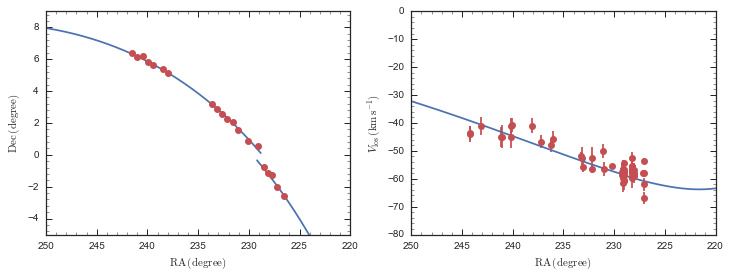

In [7]:
figsize(12,4)
subplot(1,2,1)
bovy_plot.bovy_plot(trackRADec_trailing[:,0],
                    trackRADec_trailing[:,1],
                    color=sns.color_palette()[0],
                    xrange=[250.,220.],
                    yrange=[-5.,9.],
                    xlabel=r'$\mathrm{RA}\,(\mathrm{degree})$',
                    ylabel=r'$\mathrm{Dec}\,(\mathrm{degree})$',
                   gcf=True)
bovy_plot.bovy_plot(trackRADec_leading[:,0],
                    trackRADec_leading[:,1],
                    color=sns.color_palette()[0],
                    overplot=True)
subplot(1,2,2)
bovy_plot.bovy_plot(trackRAVlos_trailing[:,0],
                    trackRAVlos_trailing[:,1],
                    color=sns.color_palette()[0],
                    xrange=[250.,220.],
                    yrange=[-80.,0.],
                    xlabel=r'$\mathrm{RA}\,(\mathrm{degree})$',
                    ylabel=r'$V_{\mathrm{los}}\,(\mathrm{km\,s}^{-1})$',
                   gcf=True)
bovy_plot.bovy_plot(trackRAVlos_leading[:,0],
                    trackRAVlos_leading[:,1],
                    color=sns.color_palette()[0],
                    overplot=True)
plot_data_add_labels()

# The case of $c=1.5$ using interpolation

In [8]:
p_b15= [0.60122692,0.36273147,-0.97591502,-3.34169377,
        0.71877924,-0.01519337,-0.01928001]
c1p5= pal5_util.predict_pal5obs(p_b15,[1.5],interpcs=[1.25,1.55])

In [9]:
trackRADec_trailing= c1p5[0][0]
trackRADec_leading= c1p5[1][0]
trackRAVlos_trailing= c1p5[2][0]
trackRAVlos_leading= c1p5[3][0]
print c1p5[4], c1p5[5]

[ 27.83889098] [ 21.40807082]


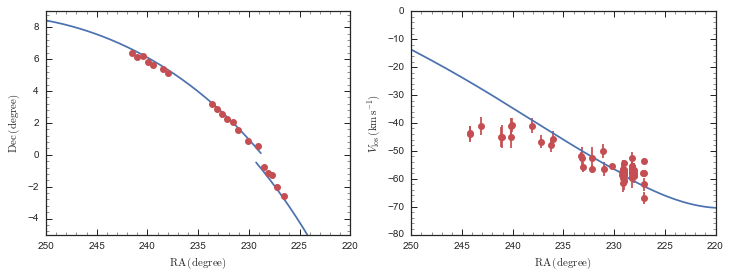

In [10]:
figsize(12,4)
subplot(1,2,1)
bovy_plot.bovy_plot(trackRADec_trailing[:,0],
                    trackRADec_trailing[:,1],
                    color=sns.color_palette()[0],
                    xrange=[250.,220.],
                    yrange=[-5.,9.],
                    xlabel=r'$\mathrm{RA}\,(\mathrm{degree})$',
                    ylabel=r'$\mathrm{Dec}\,(\mathrm{degree})$',
                   gcf=True)
bovy_plot.bovy_plot(trackRADec_leading[:,0],
                    trackRADec_leading[:,1],
                    color=sns.color_palette()[0],
                    overplot=True)
subplot(1,2,2)
bovy_plot.bovy_plot(trackRAVlos_trailing[:,0],
                    trackRAVlos_trailing[:,1],
                    color=sns.color_palette()[0],
                    xrange=[250.,220.],
                    yrange=[-80.,0.],
                    xlabel=r'$\mathrm{RA}\,(\mathrm{degree})$',
                    ylabel=r'$V_{\mathrm{los}}\,(\mathrm{km\,s}^{-1})$',
                   gcf=True)
bovy_plot.bovy_plot(trackRAVlos_leading[:,0],
                    trackRAVlos_leading[:,1],
                    color=sns.color_palette()[0],
                    overplot=True)
plot_data_add_labels()

# Many between two points

In [11]:
p_b15= [0.60122692,0.36273147,-0.97591502,-3.34169377,
        0.71877924,-0.01519337,-0.01928001]
cs= numpy.arange(1.25,1.55,0.05)
c1p5= pal5_util.predict_pal5obs(p_b15,cs,interpcs=[1.25,1.55])

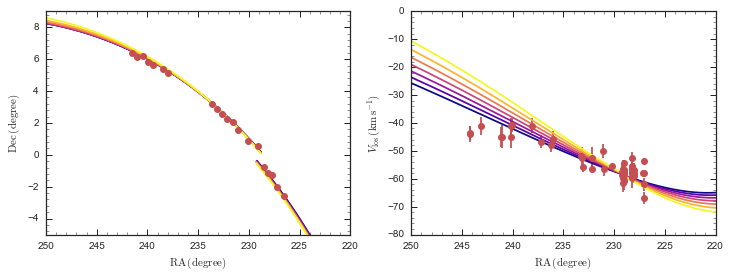

In [12]:
figsize(12,4)
cmap= cm.plasma
for ii, c in enumerate(cs):
    tc= cmap((c-numpy.amin(cs))/(numpy.amax(cs)-numpy.amin(cs)))
    subplot(1,2,1)
    bovy_plot.bovy_plot(c1p5[0][ii,:,0],c1p5[0][ii,:,1],
                        color=tc,overplot=True)
    bovy_plot.bovy_plot(c1p5[1][ii,:,0],c1p5[1][ii,:,1],
                        color=tc,overplot=True)
    subplot(1,2,2)
    bovy_plot.bovy_plot(c1p5[2][ii,:,0],c1p5[2][ii,:,1],
                        color=tc,overplot=True)
    bovy_plot.bovy_plot(c1p5[3][ii,:,0],c1p5[3][ii,:,1],
                        color=tc,overplot=True)
plot_data_add_labels()

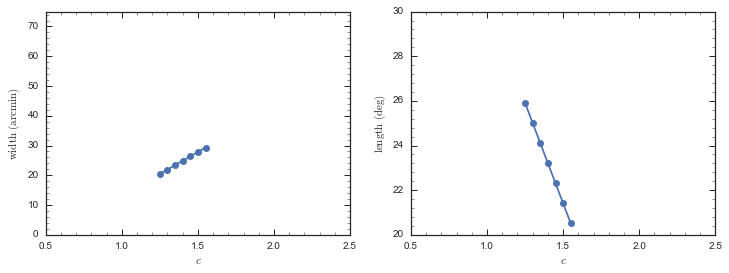

In [13]:
subplot(1,2,1)
bovy_plot.bovy_plot(cs,c1p5[4],'o-',
                    xrange=[0.5,2.5],
                    yrange=[0.,75.],
                    xlabel=r'$c$',
                    ylabel=r'$\mathrm{width}\ (\mathrm{arcmin})$',
                   gcf=True)
subplot(1,2,2)
bovy_plot.bovy_plot(cs,c1p5[5],'o-',
                    xrange=[0.5,2.5],
                    yrange=[20.,30.],
                    xlabel=r'$c$',
                    ylabel=r'$\mathrm{length}\ (\mathrm{deg})$',
                   gcf=True)

# Many between many points

In [14]:
p_b15= [0.60122692,0.36273147,-0.97591502,-3.34169377,
        0.71877924,-0.01519337,-0.01928001]
cs= numpy.arange(0.75,2.35,0.1)
c1p5= pal5_util.predict_pal5obs(p_b15,cs,interpcs=[0.75,1.25,1.75,2.25])

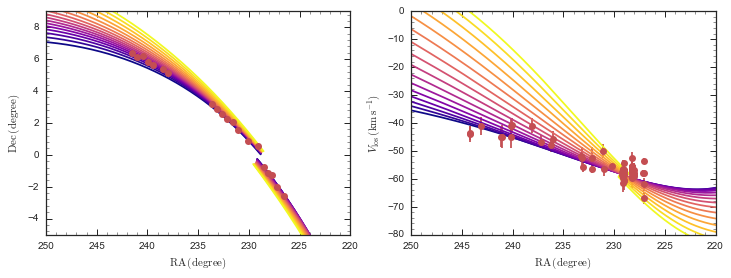

In [15]:
figsize(12,4)
cmap= cm.plasma
for ii, c in enumerate(cs):
    tc= cmap((c-numpy.amin(cs))/(numpy.amax(cs)-numpy.amin(cs)))
    subplot(1,2,1)
    bovy_plot.bovy_plot(c1p5[0][ii,:,0],c1p5[0][ii,:,1],
                        color=tc,overplot=True)
    bovy_plot.bovy_plot(c1p5[1][ii,:,0],c1p5[1][ii,:,1],
                        color=tc,overplot=True)
    subplot(1,2,2)
    bovy_plot.bovy_plot(c1p5[2][ii,:,0],c1p5[2][ii,:,1],
                        color=tc,overplot=True)
    bovy_plot.bovy_plot(c1p5[3][ii,:,0],c1p5[3][ii,:,1],
                        color=tc,overplot=True)
plot_data_add_labels()

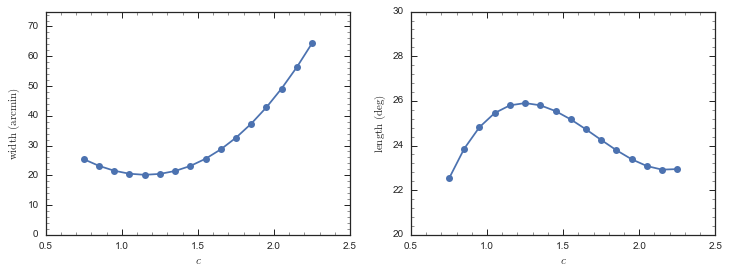

In [16]:
subplot(1,2,1)
bovy_plot.bovy_plot(cs,c1p5[4],'o-',
                    xrange=[0.5,2.5],
                    yrange=[0.,75.],
                    xlabel=r'$c$',
                    ylabel=r'$\mathrm{width}\ (\mathrm{arcmin})$',
                   gcf=True)
subplot(1,2,2)
bovy_plot.bovy_plot(cs,c1p5[5],'o-',
                    xrange=[0.5,2.5],
                    yrange=[20.,30.],
                    xlabel=r'$c$',
                    ylabel=r'$\mathrm{length}\ (\mathrm{deg})$',
                   gcf=True)

These latter trends aren't quite correct (both should probably have their extremum near $c=1$), but that's because the interpolation grid isn't good enough. The method works though.